# Group Project :>

##Install packages

In [ ]:
from google.colab import files

In [ ]:
dataset = files.upload()

Saving dataset_football_cleaned.csv to dataset_football_cleaned (1).csv


KeyboardInterrupt: ignored

# Directory

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin

# Loading Data

In [ ]:
df = pd.read_csv("dataset_football_cleaned.csv")
#preview
df.head(5)

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,yellow_card_champ,second_yellow_card_champ,red_card_champ,penalty_goal_champ,conceded_goal_champ,clean_sheet_champ,goal_cup,assist_cup,own_goal_cup,sub_on_cup,sub_out_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,penalty_goal_cup,conceded_goal_cup,clean_sheet_cup,goal_continent,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,3.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,237.0,59.0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,22.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LéoNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,1.0,6.0,0.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,André,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,2.0,13.0,4.0,0.0,27.0,11.0,3.0,0.0,0.0,1.0,0.0,0,3.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,NaN,1.0,1.0,0.0,30.0,13.0,3.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
df = df.iloc[:,2:]

# Data Preprocessing


In [ ]:
#customized transformer
class DataSelector(BaseEstimator,TransformerMixin):
  def __init__(self,attribute_names, is_num = True):
    self.attribute_names = attribute_names;
    self.is_num = is_num
    self.df = pd.DataFrame()
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    if (self.is_num):
      return X[self.attribute_names]
    else:
      for i in self.attribute_names:
        encoded,_ = X[i].factorize()
        self.df[i] = encoded
      return self.df


In [ ]:
cat_attribs = ["nation","league","team","position"]
num_attribs = (df.drop(cat_attribs, axis=1).columns).tolist()

In [ ]:
name_pipeline = Pipeline([
    ("selector",DataSelector(cat_attribs,is_num=False)),
    ("imputer",SimpleImputer(strategy="most_frequent")),    
])

In [ ]:
num_pipeline = Pipeline([    
    ("selector",DataSelector(num_attribs,is_num=True)),
    ("imputer",SimpleImputer(strategy="most_frequent")),          
])

In [ ]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),  
    ("name_pipeline", name_pipeline),
])

In [ ]:
futball_df = pd.DataFrame(full_pipeline.fit_transform(df))
futball_df = pd.DataFrame(futball_df)
futball_df.columns =  num_attribs + cat_attribs
# # split dataset
# X = futball_df.drop(["price"], axis=1)
# Y = pd.DataFrame(futball_df["price"])
# #later do
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
#label price in different stratifier
def y_price_seperator(y):
  y = np.array(y)
  price = []
  for i in y:
    if (i<1000):
      price.append(3)
    elif (i>=1000 and 10000>i):
      price.append(4)
    elif (i>=10000 and 100000>i):
      price.append(5)
    elif (i>=100000 and 1000000>i):
      price.append(6)
    elif (i>=1000000 and 10000000>i):
      price.append(7)
    elif (i>=10000000 and 100000000>i):
      price.append(8)
    else:
      price.append(9)
  return price

In [ ]:
# y_train_price = pd.DataFrame(y_price_seperator(y_train),columns=["price"])
# y_test_price = pd.DataFrame(y_price_seperator(y_test), columns=["price"])

In [ ]:
# # fit transform
# #X_train
# X_train_std = StandardScaler()
# X_train = X_train_std.fit_transform(X_train)
# #X_test
# X_test_std = StandardScaler()
# X_X_test = X_test_std.fit_transform(X_test)
# #Y_train
# Y_train_std = StandardScaler()
# Y_train = Y_train_std.fit_transform(y_train)


In [ ]:
len(futball_df)

12711

In [ ]:
new_futball_df = futball_df
# new_futball_df = new_futball_df.assign(price=y_price_seperator(df["price"]))
##new method
new_futball_df = new_futball_df.assign(price=np.log10(df["price"]))


In [ ]:
new_futball_df.head(5)

,age,goals_selection,selections_nation,price,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,yellow_card_champ,second_yellow_card_champ,red_card_champ,penalty_goal_champ,conceded_goal_champ,clean_sheet_champ,goal_cup,assist_cup,own_goal_cup,sub_on_cup,sub_out_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,penalty_goal_cup,conceded_goal_cup,clean_sheet_cup,goal_continent,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent,nation,league,team,position
0,28.0,0.0,60.0,6.602060,3.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,237.0,59.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,22.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.0,0.0,0.0,5.903090,1.0,6.0,0.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,20.0,0.0,1.0,5.812913,2.0,13.0,4.0,0.0,27.0,11.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0
3,21.0,0.0,0.0,4.698970,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0
4,30.0,0.0,0.0,5.301030,1.0,1.0,1.0,0.0,30.0,13.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,3.0


In [ ]:
corr_matrix = new_futball_df.corr()

In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price                           1.000000
assist_champ                    0.476510
end_contract                    0.462002
goal_champ                      0.444534
sub_out_champ                   0.442418
yellow_card_champ               0.418235
sub_on_continent                0.400937
sub_on_champ                    0.394261
sub_out_continent               0.392811
assist_continent                0.367448
yellow_card_continent           0.352680
assist_cup                      0.324893
goal_continent                  0.323820
selections_nation               0.322210
goal_cup                        0.316679
sub_out_cup                     0.303017
sub_on_cup                      0.298990
yellow_card_cup                 0.260518
goals_selection                 0.254283
red_card_champ                  0.226629
second_yellow_card_champ        0.226347
penalty_goal_continent          0.175267
own_goal_champ                  0.124985
red_card_continent              0.122827
second_yellow_ca

In [ ]:
###Help design parameter, say df["new column"] = df[]/df[]

#drop the NaN
drop_list = ["clean_sheet_champ","conceded_goal_cup","clean_sheet_cup","conceded_goal_continent","clean_sheet_continent"]
new_futball_df = new_futball_df.drop(drop_list,axis=1)

## PCA -> ML



In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
pca = PCA()
price = new_futball_df["price"]
new_futball_df = new_futball_df.drop(["price"],axis=1)
pca.fit(new_futball_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
cumsum

array([0.89961328, 0.9574202 , 0.97538886, 0.98945426, 0.99179555,
       0.99370162, 0.99549404, 0.9969551 , 0.99787608, 0.99844568,
       0.99887561, 0.99912567, 0.99931035, 0.99948971, 0.99961156,
       0.99971653, 0.99979685, 0.99983342, 0.99985986, 0.99988432,
       0.99990381, 0.9999203 , 0.99993571, 0.99994802, 0.99995813,
       0.99996705, 0.9999751 , 0.99998217, 0.99998828, 0.99999325,
       0.99999772, 0.99999886, 0.99999944, 0.99999973, 0.99999991,
       1.        ])

In [ ]:
d = np.argmax(cumsum>=0.99)+1

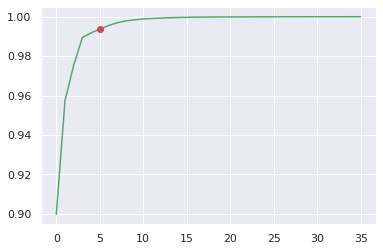

In [ ]:
sns.set()
fig = plt.plot()
plt.plot(cumsum,"g")
plt.plot(d,cumsum[d],"r",marker="o")
plt.show()

In [ ]:
pca = PCA(n_components=d)
pca.fit(new_futball_df)
PCAS = pd.DataFrame(pca.components_,columns=new_futball_df.columns)

In [ ]:
PCAS

,age,goals_selection,selections_nation,end_contract,goal_champ,assist_champ,own_goal_champ,sub_on_champ,sub_out_champ,yellow_card_champ,second_yellow_card_champ,red_card_champ,penalty_goal_champ,conceded_goal_champ,goal_cup,assist_cup,own_goal_cup,sub_on_cup,sub_out_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,penalty_goal_cup,goal_continent,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,nation,league,team,position
0,0.001150,-0.000490,-0.004319,-0.001063,-0.009893,-0.007840,-0.000087,-0.013373,-0.018520,-0.010985,-0.000282,-0.000262,-0.029388,-0.008046,-0.000669,-0.000480,-0.000015,-0.000872,-0.000988,-0.000405,-0.000013,-0.001192,-0.000410,-0.000299,-0.000334,-0.000011,-0.000481,-0.000503,-0.000255,-0.000965,-0.000188,-0.000015,0.051656,0.057809,0.996108,0.000560
1,0.016101,-0.003698,0.008728,-0.000068,-0.070768,-0.056427,0.001169,-0.117661,-0.149879,-0.033190,-0.001939,0.001260,0.941541,0.249928,-0.005248,-0.004136,0.000264,-0.008371,-0.008028,-0.004529,0.000025,0.044358,0.012544,-0.003070,-0.002879,0.000196,-0.004344,-0.007380,-0.003436,0.040381,0.010425,-0.000212,0.005155,0.000466,0.023719,-0.017995
2,0.057961,0.020824,0.132820,0.002007,0.332137,0.265605,0.001155,0.408202,0.626130,0.276413,0.007407,0.007165,0.188821,0.044184,0.024674,0.019439,-0.000006,0.030158,0.038250,0.016208,0.000424,0.005677,0.003900,0.021576,0.019484,0.000119,0.030275,0.041256,0.017899,0.011032,0.003665,0.001901,-0.337555,0.033110,0.047764,0.001525
3,0.020523,0.014649,0.106015,0.000126,0.123206,0.097235,0.000436,0.144231,0.228107,0.077879,0.001683,0.001787,0.063667,0.013784,0.004909,0.003765,-0.000113,0.001578,0.003685,-0.000584,-0.000055,-0.007931,-0.001867,0.005416,0.005071,0.000040,0.006969,0.009748,0.003214,0.001759,0.000348,0.000464,0.931942,-0.102356,-0.030920,0.007677
4,0.002626,0.092503,0.641560,0.006405,0.346947,0.283757,0.000532,-0.527727,-0.163607,0.104752,0.003620,0.002334,-0.062914,0.040551,0.025558,0.023399,0.000198,-0.006298,0.004136,0.014536,0.000585,0.009549,0.009525,0.061352,0.048978,0.000417,0.024191,0.058279,0.037732,0.043321,0.012879,0.006479,-0.056099,-0.195857,0.012471,-0.009071


In [ ]:
#components
print(pca.n_components)

5


In [ ]:
#showing matrix of PCA
dataPCA = pca.transform(new_futball_df)

In [ ]:
pca_futball_df = pd.DataFrame(dataPCA)

In [ ]:
len(pca_futball_df)

12711

In [ ]:
len(price)

12711

# split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_futball_df, price, test_size=0.33, random_state=42)
nonPca_X_train, nonPca_X_test, nonPca_y_train, nonPca_y_test = train_test_split(new_futball_df,price, test_size=0.33, random_state=42)
_, _, _, new_y_test_log_10 = train_test_split(pca_futball_df,np.log10(df["price"]), test_size=0.33, random_state=42)



# Indicator

In [ ]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
def all_model(X_train,y_train,X_test,y_test):
    scores={}
    mse_scores={}
    test_error={}
    def test_model(models):
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        mse_scores = cross_val_score(models,X_train,y_train,scoring="neg_mean_squared_error",cv=cv)
        mse_scores = np.sqrt(-mse_scores)
        mse_scores = [mse_scores.mean()]
        clf.fit(X_train,y_train)
        y_hat = clf.predict(X_test)
        test_error = [mean_squared_error(y_hat,y_test)]
        return scores,mse_scores,test_error

    clf = linear_model.LinearRegression()
    l_list = test_model(clf)
    scores["Linear"] =l_list[0]
    mse_scores["Linear"] = l_list[1]
    test_error["Linear"] = l_list[2]
    

    clf = linear_model.Ridge()
    l_list = test_model(clf)
    scores["Ridge"]=l_list[0]
    mse_scores["Ridge"] = l_list[1]
    test_error["Ridge"] = l_list[2]
    
    
    clf = linear_model.Lasso(alpha=1e-4)
    l_list = test_model(clf)
    scores["Lasso"]=l_list[0]
    mse_scores["Lasso"] = l_list[1]
    test_error["Lasso"] = l_list[2]
   
    
    clf = BaggingRegressor()
    l_list = test_model(clf)
    scores["Bagging"]=l_list[0]
    mse_scores["Bagging"] = l_list[1]
    test_error["Bagging"] = l_list[2]
    
    clf = RandomForestRegressor()
    l_list = test_model(clf)
    scores["RandomForest"]=l_list[0]
    mse_scores["RandomForest"] = l_list[1]
    test_error["RandomForest"] = l_list[2]
   
    
    clf = svm.SVR()
    l_list = test_model(clf)
    scores["SVM RBF"]=l_list[0]
    mse_scores["SVM RBF"] = l_list[1]
    test_error["SVM RBF"] = l_list[2]
    
    
    clf = svm.SVR(kernel="linear")
    l_list = test_model(clf)
    scores["SVM Linear"]=l_list[0]
    mse_scores["SVM Linear"] = l_list[1]
    test_error["SVM Linear"] = l_list[2]
    return scores,mse_scores,test_error


In [ ]:
def pandas_plot(results,scores):  
  results = pd.DataFrame.from_dict(results)
  keys = np.array(results)[0].tolist()
  values = results.columns
  dictionary = dict(zip(keys, values))
  a = ([(k,dictionary[k]) for k in sorted(dictionary.keys())])
  results = pd.DataFrame([a[i][0] for i in range(0,len(a))],index=[a[i][1] for i in range(0,len(a))])
  print(results)
  plt.figure(figsize=(30,30))
  results.plot(kind="bar",title=scores,)
  axes = plt.gca()

In [ ]:
pca_r_2,pca_cross_mse,pca_test_error = all_model(X_train,y_train,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [ ]:
#np pca
nonPca_r_2,nonPca_cross_mse,nonPca_test_error = all_model(nonPca_X_train, nonPca_y_train,nonPca_X_test, nonPca_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

                     0
SVM Linear    0.435393
Lasso         0.458694
Linear        0.458696
Ridge         0.458697
SVM RBF       0.536639
Bagging       0.545215
RandomForest  0.549521


<Figure size 2160x2160 with 0 Axes>

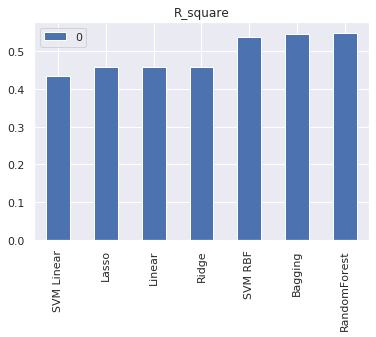

In [ ]:
pandas_plot(pca_r_2,"R_square")

                     0
RandomForest  0.675349
Bagging       0.680737
SVM RBF       0.684741
Ridge         0.740040
Linear        0.740041
Lasso         0.740042
SVM Linear    0.755986


<Figure size 2160x2160 with 0 Axes>

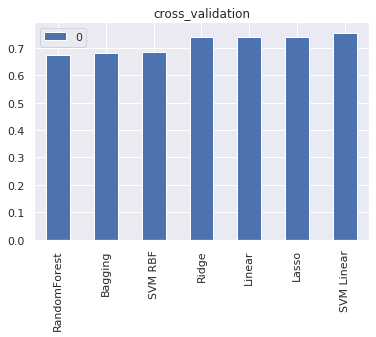

In [ ]:
pandas_plot(pca_cross_mse,"cross_validation")

                     0
SVM RBF       0.443434
Bagging       0.455344
RandomForest  0.461071
Lasso         0.541296
Ridge         0.541312
Linear        0.541314
SVM Linear    0.554887


<Figure size 2160x2160 with 0 Axes>

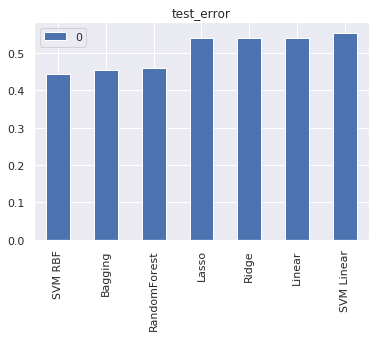

In [ ]:
pandas_plot(pca_test_error,"test_error")

                     0
SVM Linear    0.434049
Linear        0.460345
Ridge         0.460351
Lasso         0.460405
SVM RBF       0.545263
RandomForest  0.640567
Bagging       0.643920


<Figure size 2160x2160 with 0 Axes>

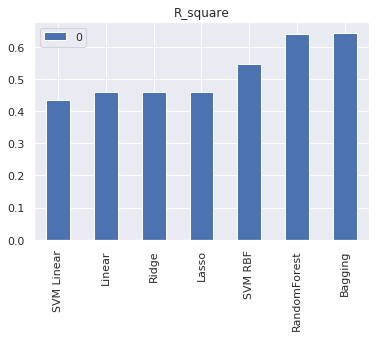

In [ ]:
pandas_plot(nonPca_r_2,"R_square")

                     0
Bagging       0.598023
RandomForest  0.602881
SVM RBF       0.678373
Lasso         0.738815
Ridge         0.738850
Linear        0.738854
SVM Linear    0.756911


<Figure size 2160x2160 with 0 Axes>

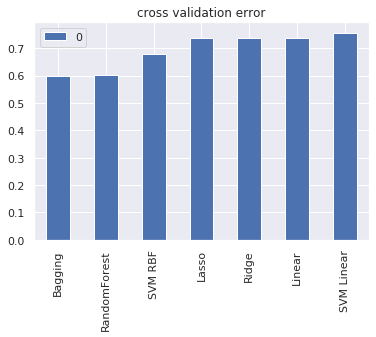

In [ ]:
pandas_plot(nonPca_cross_mse,"cross validation error")

                     0
Bagging       0.350418
RandomForest  0.355722
SVM RBF       0.438975
Lasso         0.539847
Ridge         0.539877
Linear        0.539882
SVM Linear    0.552565


<Figure size 2160x2160 with 0 Axes>

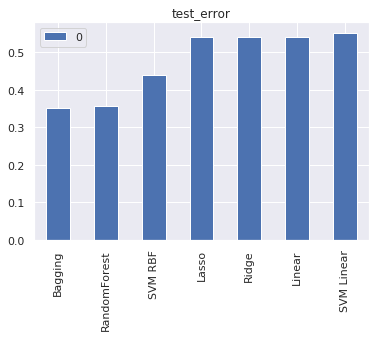

In [ ]:
pandas_plot(nonPca_test_error,"test_error")

In [ ]:
## random forest algo should be used

# Identifier

In [ ]:
def cross_validation(models,X_train,y_train,K):
  scores = cross_val_score(models,X_train,y_train,scoring="neg_mean_squared_error",cv=K)
  scores = np.sqrt(-scores)
  print("RMSE Scores: {}".format(scores))
  print("Mean: {}".format(scores.mean()))
  print("Standard deviation: {}".format(scores.std()))

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,cross_val_predict
# X_train, X_test, y_train, y_test

In [ ]:
# reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression()

In [ ]:
# print("reg.score: {}".format(reg.score))
# print("reg.coef : {}".format(reg.coef_) )
# print("reg.intercept: {}".format(reg.intercept_))

In [ ]:
# training error
cross_validation(reg,X_train,y_train,10)

RMSE Scores: [0.76126774 0.74760043 0.72798869 0.78070829 0.76409876 0.72693402
 0.70963589 0.72980659 0.7299819  0.72844845]
Mean: 0.7406470753426004
Standard deviation: 0.020780973948276698


In [ ]:
#test error
reg.fit(X_train,y_train)
scores = reg.predict(X_test)
mse = mean_squared_error(scores,y_test)

In [ ]:
print("test set Mean Squared error : " + str(mse))

test set Mean Squared error : 0.5413136481987199


# LASSO

In [ ]:
#training error
lasso_reg = Lasso(alpha=0.1)
cross_validation(lasso_reg,X_train,y_train_price,10)

RMSE Scores: [0.70840939 0.67335817 0.64876119 0.7120047  0.69185024 0.67369049
 0.6485757  0.6714042  0.67471021 0.6515783 ]
Mean: 0.6754342592196076
Standard deviation: 0.021726248571126733


In [ ]:
#test error
lasso_reg.fit(X_train,y_train_price)
lasso_scores = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(lasso_scores,y_test_price)

In [ ]:
lasso_mse

0.44184897617292923

In [ ]:
#gridSearch
lasso_reg = Lasso()
param_grid = [
              {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]},
]
#cross vaidation
lasso_grid_search = GridSearchCV(lasso_reg,param_grid,cv=5,scoring="neg_mean_squared_error")
lasso_grid_search.fit(X_train,y_train_price)

#best model
print(lasso_grid_search.best_params_)
#test set
lasso_scores = lasso_grid_search.predict(X_test)
lasso_mse = mean_squared_error(lasso_scores,y_test_price)
print("lasso_mse: {}".format(lasso_mse))

{'alpha': 0.1}
lasso_mse: 0.44184897617292923


# Ridge Regression

In [ ]:
#training error
ridge_reg = Ridge(alpha=0.1)
cross_validation(ridge_reg,X_train,y_train_price,10)
#test error
ridge_reg.fit(X_train,y_train_price)
ridge_reg = ridge_reg.predict(X_test)
ridge_reg_error = mean_squared_error(lasso_scores,y_test_price)
print("ridge_regression: {}".format(ridge_reg_error))

RMSE Scores: [0.63886773 0.62739736 0.61093979 0.65518309 0.64124305 0.61005384
 0.59553754 0.61246495 0.61261233 0.61132518]
Mean: 0.62156248566032
Standard deviation: 0.017439748528890783
ridge_regression: 0.44184897617292923


In [ ]:
#gridSearch
ridge_reg = Ridge()
param_grid = [
              {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]},
]
#cross vaidation
ridge_reg_search = GridSearchCV(ridge_reg,param_grid,cv=5,scoring="neg_mean_squared_error")
ridge_reg_search.fit(X_train,y_train_price)

#best model
print(ridge_reg_search.best_params_)
#test set
ridge_scores = ridge_reg_search.predict(X_test)
ridge_mse = mean_squared_error(ridge_scores,y_test_price)
print("ridge_mse: {}".format(ridge_mse))

{'alpha': 1}
ridge_mse: 0.3812365062100795


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
clf = RandomForestRegressor(200)

In [ ]:
## random forest does a good job :>
from sklearn.model_selection import GridSearchCV

In [ ]:
def SpecificGrid(dictionary_):
  param_grid = [
                dictionary_,
  ]

  forest_reg_grid_version = RandomForestRegressor(random_state=42)
  #cross validation + gridSearch
  pca_grid_search = GridSearchCV(forest_reg_grid_version,param_grid,cv=5,scoring="neg_mean_squared_error")
  pca_grid_search.fit(X_train,y_train)

  #best model
  print(pca_grid_search.best_params_)
  #test
  pca_grid_forest_score = pca_grid_search.predict(X_test)
  pca_grid_forest_score = mean_squared_error(pca_grid_forest_score,y_test)
  print(pca_grid_forest_score)
  return pca_grid_search

In [ ]:
Search_by_featuress = SpecificGrid({'n_estimators':[150],'max_features':[1,2,3,4,5]})

{'max_features': 4, 'n_estimators': 150}
0.14430949884460684


In [ ]:
Search_by_50s = SpecificGrid({'n_estimators':[50,100,150],'max_features':[4]})

{'max_features': 4, 'n_estimators': 150}
0.14430949884460684


In [ ]:
Search_by_50s.cv_results_['mean_test_score']

array([-0.14493053, -0.1440791 , -0.1439955 ])

In [ ]:
Search_by_50s.best_params_

{'max_features': 4, 'n_estimators': 150}

In [ ]:
Search_by_tens = SpecificGrid({'n_estimators':[150,160,170,180,190,200],'max_features':[4]})

{'max_features': 4, 'n_estimators': 200}
0.1430097965023944


In [ ]:
Search_by_tens.best_params_

{'max_features': 4, 'n_estimators': 200}

In [ ]:
Search_by_tens.cv_results_['mean_test_score']

array([-0.14379969, -0.1436734 , -0.14335322, -0.14285743, -0.14277659,
       -0.14247319])

In [ ]:
Search_by_ones= SpecificGrid({'n_estimators':[191,192,193,194,195,196,197,198,199],'max_features':[4]})

{'max_features': 4, 'n_estimators': 198}
0.14397999639883294


In [ ]:
print(Search_by_ones.best_params_)
print(Search_by_ones.cv_results_['mean_test_score'])

{'max_features': 4, 'n_estimators': 199}
[-0.14287385 -0.14291859 -0.1431279  -0.14303189 -0.14300529 -0.14321976
 -0.14273549 -0.14296113 -0.14265225]


Text(0.5, 1.0, 'search by 10')

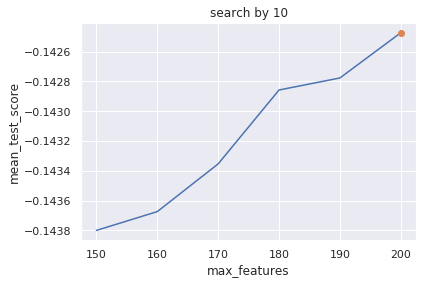

In [ ]:
plt.plot([150,160,170,180,190,200],Search_by_tens.cv_results_['mean_test_score'])
plt.xlabel("max_features")
plt.plot([200],Search_by_tens.cv_results_['mean_test_score'][-1],marker="o")
plt.ylabel("mean_test_score")
plt.title("search by 10")

Text(0.5, 0, 'max_features')

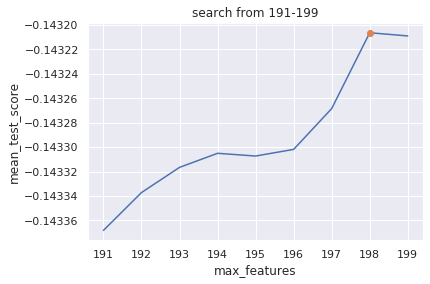

In [ ]:
plt.plot([191,192,193,194,195,196,197,198,199],Search_by_ones.cv_results_['mean_test_score'])
plt.plot([198],Search_by_ones.cv_results_['mean_test_score'][-2],marker="o")
plt.ylabel("mean_test_score")
plt.title("search from 191-199")
plt.xlabel("max_features")

In [ ]:
pca_classifier = RandomForestRegressor(n_estimators=1500,max_features=4)
pca_classifier.fit(X_train,y_train)
# Predicting Test set results
pca_y_pred = pca_classifier.predict(X_test)

In [ ]:
####
# float point y model
counts_on_correctly_predicted = np.abs((pca_y_pred-y_test)/y_test) < 0.08
#convert bool -> int
counts_on_correctly_predicted = counts_on_correctly_predicted.astype(int)
#calculate the accuracy -> number of true/length
acc = np.sum(counts_on_correctly_predicted)/(np.shape(counts_on_correctly_predicted)[0])
print(acc)

0.8028605482717521


In [ ]:
feature_importances = pd.DataFrame(pca_classifier.feature_importances_,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [ ]:
feature_importances

,importance
0,0.340301
2,0.339654
1,0.120303
4,0.115184
3,0.084559


# deep Learning

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import KFold

In [ ]:
tf.__version__

'2.0.0'

In [ ]:
Xstd = StandardScaler()
Ystd = StandardScaler()
X_std = StandardScaler()
Y_std = StandardScaler()
X1_train = Xstd.fit_transform(np.array(X_train))
y1_train = Ystd.fit_transform(np.array(y_train).reshape(1,-1))
X1_test = X_std.fit_transform(np.array(X_test))
y1_test = Y_std.fit_transform(np.array(y_test).reshape(1,-1))

In [ ]:
#tmr do

def model(size):
  
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(size*2,activation="sigmoid",input_shape=(size,)))
  model.add(tf.keras.layers.Dense(size*5,activation=LeakyReLU(alpha=0.1)))
  model.add(tf.keras.layers.Dense(size,activation="sigmoid"))
  model.add(tf.keras.layers.Dense(7,activation="sigmoid"))
  # model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
def cross_validation(model,n_split,X,y,X_,y_):
  temp = []
  temp2 = []
  for train_index,test_index in KFold(n_split).split(X):
    x_train,x_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    history = model.fit(x_train, y_train,
                      batch_size=64,
                      epochs=20)
    results = model.evaluate(x_test,y_test, batch_size=128)
    temp.append(results[0])
    temp2.append(results[1])
  return temp,temp2




In [ ]:
pca = model(np.shape(X_test)[1])
pca_error,pca_acc = cross_validation(pca,3,X1_train,y1_train[0],X1_test,y1_test[0])

Train on 5677 samples
Epoch 1/20
5677/5677 [==============================] - 1s 165us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/20
5677/5677 [==============================] - 0s 39us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
5677/5677 [==============================] - 0s 36us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
5677/5677 [==============================] - 0s 36us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
5677/5677 [==============================] - 0s 36us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
5677/5677 [==============================] - 0s 38us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
5677/5677 [==============================] - 0s 36us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
5677/5677 [==============================] - 0s 36us/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
5677/5677 [==============================] - 0s 35us/sample - loss: 0.0000e+00 - accuracy: 1.0

In [ ]:
def calMovingAverage(data,error):
  temp = []
  for i in range(1,len(data)):
    temp.append(np.sum(data[0:i])/i)
  plt.plot(temp)
  plt.xlabel("#Iterations")
  plt.ylabel("values/errors")
  if (error):
    plt.legend("error")
  else:
    plt.legend("validation")
  return np.array(temp)

#graph of non pca
calMovingAverage(non_pca_error,True)#error
calMovingAverage(non_pca_acc,False)#acc

NameError: ignored

array([0.69390631, 0.7129271 ])

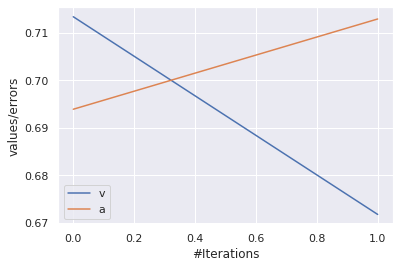

In [ ]:
#graph of  pca:
calMovingAverage(non_pca_error,True)#error
calMovingAverage(non_pca_acc,False)#acc